In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path
PDBMINE_URL = os.getenv("PDBMINE_URL")
PROJECT_DIR = 'casp_da'
import torch
from torch import nn
import torch.nn.functional as F

Initializing T1082 ...
Results already exist
Casp ID: T1082 	PDB: 7cn6
Structure exists: 'pdb/pdb7cn6.ent' 
No AlphaFold prediction found for 7cn6
No AlphaFold phi-psi data found
Slope: 0.11166312609208276, Intercept: 2.079224129184083


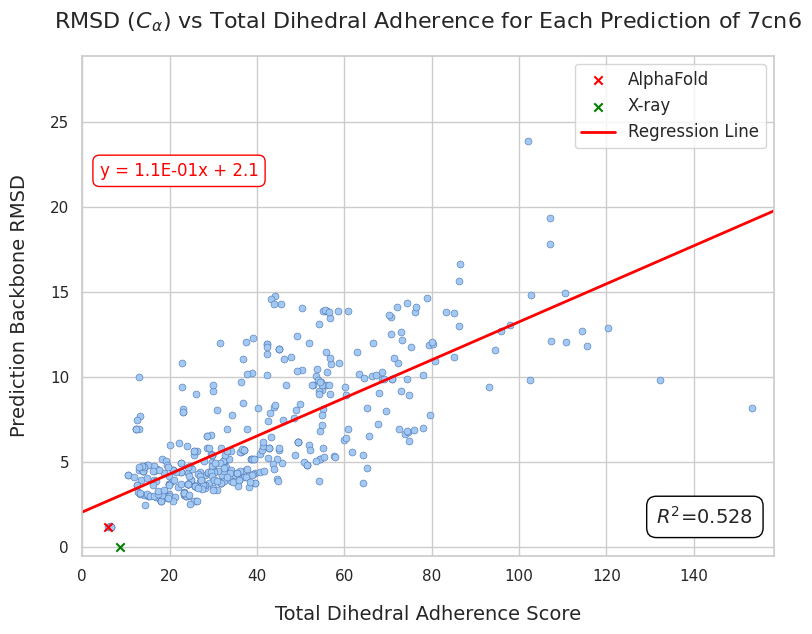

Highest DA Differences:

|   pos |   pos_xray | seq_ctxt   |   da_pred |   da_xray |   da_diff |
|------:|-----------:|:-----------|----------:|----------:|----------:|
|    78 |         56 | NYVLYCD    |  221.201  |   5.10585 |  216.095  |
|    81 |         59 | LYCDKNF    |  169.168  |  17.5768  |  151.591  |
|    79 |         57 | YVLYCDK    |  155.429  |  12.9065  |  142.522  |
|    80 |         58 | VLYCDKN    |  141.06   |  19.7409  |  121.319  |
|    77 |         55 | YNYVLYC    |  114.967  |   6.1797  |  108.787  |
|    82 |         60 | YCDKNFN    |  111.013  |   4.20804 |  106.804  |
|    88 |         66 | NNKNIIA    |   40.8157 |   7.55922 |   33.2564 |
|    76 |         54 | QYNYVLY    |   44.0648 |  16.8894  |   27.1754 |
|    54 |         32 | VKRDRPE    |   33.682  |   8.89019 |   24.7918 |
|    85 |         63 | KNFNNKN    |   28.8662 |   5.4186  |   23.4476 |


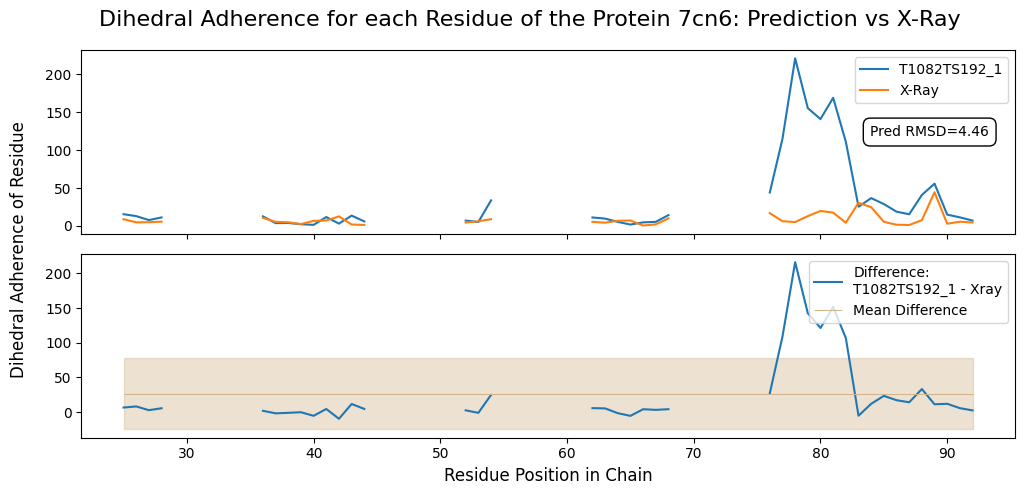

,pos,seq_ctxt,res,phi,psi,protein_id,da_pred,n_samples,n_samples_list,da_no_scale,da_na,pos_xray,da_xray,da_diff
0,25,GYDKDLC,K,-70.975354,-33.014821,T1082TS192_1,15.469664,2932.0,"[2822, 110, 0, 0]",15.469664,False,3.0,8.816058,6.653606
1,26,YDKDLCE,D,-56.422772,-36.867632,T1082TS192_1,12.937911,531.0,"[492, 20, 19, 0]",12.937911,False,4.0,4.716768,8.221143
2,27,DKDLCEW,L,-68.888022,-46.114675,T1082TS192_1,7.719672,642.0,"[563, 79, 0, 0]",7.719672,False,5.0,4.872330,2.847342
3,28,KDLCEWS,C,-69.464291,-35.218985,T1082TS192_1,11.186571,52.0,"[52, 0, 0, 0]",11.186571,False,6.0,5.576346,5.610225
4,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,88,NNKNIIA,N,-69.186699,-36.050901,T1082TS192_1,40.815658,4437.0,"[4320, 84, 27, 6]",40.815658,False,66.0,7.559220,33.256439
64,89,NKNIIAE,I,-68.731977,-41.817299,T1082TS192_1,55.792149,2254.0,"[2125, 75, 27, 27]",55.792149,False,67.0,44.461810,11.330339
65,90,KNIIAEV,I,-68.017416,-36.353755,T1082TS192_1,14.906885,5872.0,"[5716, 142, 8, 6]",14.906885,False,68.0,2.870595,12.036290
66,91,NIIAEVV,A,-67.256888,-43.112402,T1082TS192_1,11.277397,4042.0,"[3820, 210, 6, 6]",11.277397,False,69.0,5.516722,5.760675


In [45]:
proteins = ['T1024', 'T1096', 'T1027', 'T1082', 'T1091', 'T1058', 'T1049', 'T1030', 'T1056', 'T1038', 'T1025', 'T1028']
da = DihedralAdherence(
    proteins[3], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml',
    weights_file='ml_data/best_model_kde_64-64_390.pt', device='cuda')
# da.load_results()
da.load_results_da()
da.plot_da_vs_rmsd_simple()
# da.plot_dist_kde()
da.plot_res_vs_da(pred_id=da.protein_ids[2])
# da.compute_das(replace=True)
# da.plot_da_for_seq(da.overlapping_seqs[1])

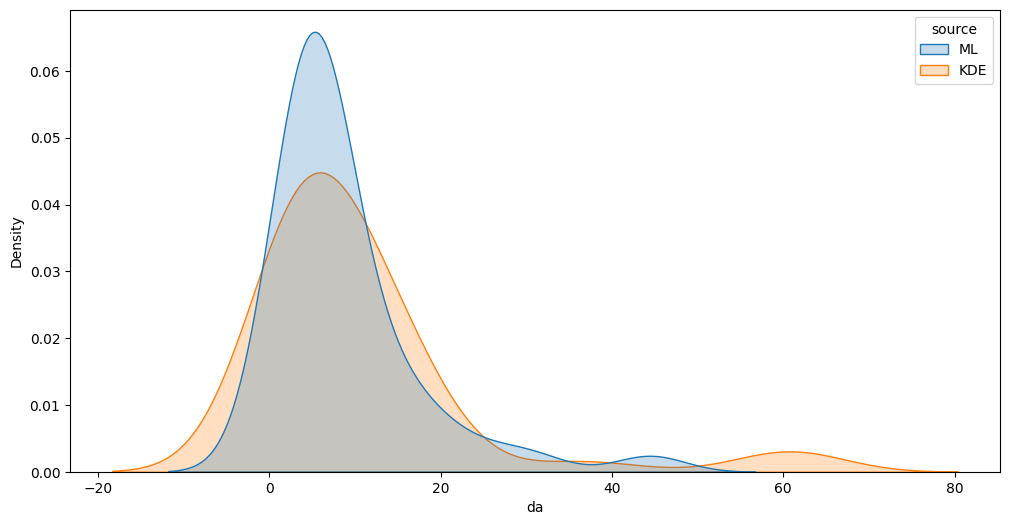

In [46]:
xray_phi_psi = pd.read_csv(da.outdir / 'xray_phi_psi_da_ml.csv')
xray_phi_psi['source'] = 'ML'
xray_phi_psi2 = pd.read_csv(da.outdir / 'xray_phi_psi_da_af.csv')
xray_phi_psi2['source'] = 'KDE'
df = pd.concat([xray_phi_psi, xray_phi_psi2], axis=0).reset_index(drop=True)
sns.set_palette('tab10')
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df, x='da', fill=True, ax=ax, common_norm=False, hue='source')
plt.show()

0.002740893112266776 -19.082372965605185


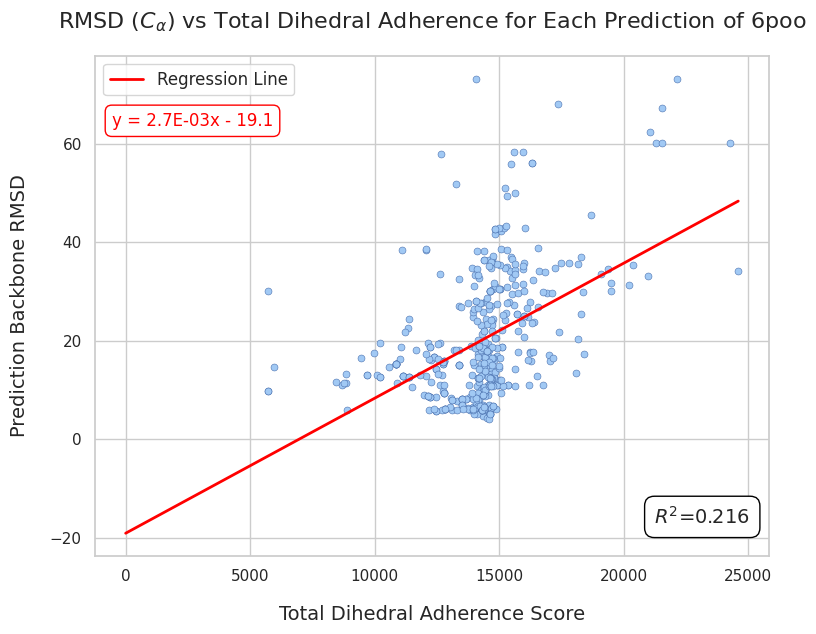

In [56]:
for protein in proteins:
    